In [3]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

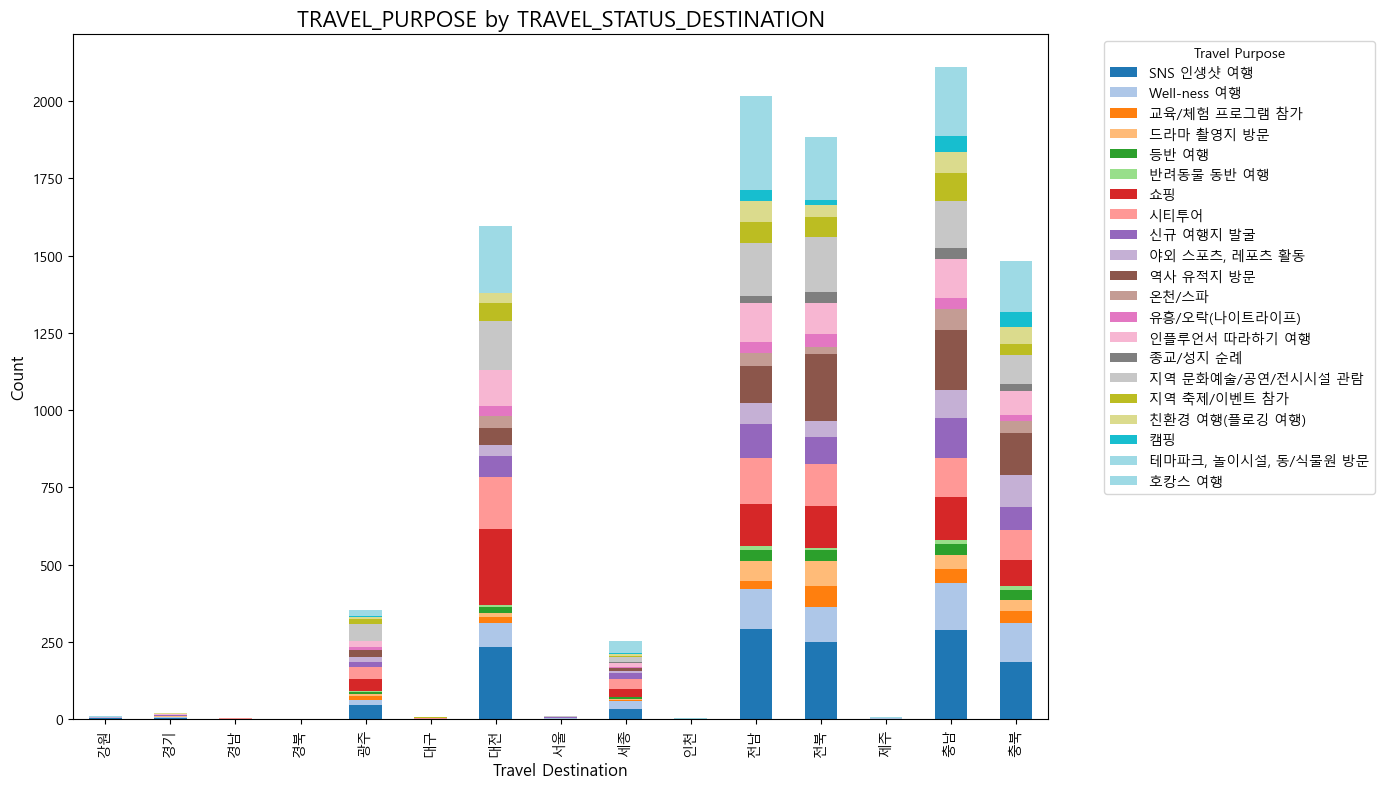

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# merge.csv 파일 불러오기
file_path = "data/training/merged_data/merge.csv"  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# TRAVEL_PURPOSE를 ';'로 분리하여 각 목적을 개별 행으로 확장
data_expanded = data.assign(
    TRAVEL_PURPOSE=data['TRAVEL_PURPOSE'].str.split(';')
).explode('TRAVEL_PURPOSE')

# TRAVEL_STATUS_DESTINATION 별 TRAVEL_PURPOSE 빈도 계산
purpose_by_destination = data_expanded.groupby(['TRAVEL_STATUS_DESTINATION', 'TRAVEL_PURPOSE']).size().reset_index(name='count')

# 시각화를 위한 피벗 테이블 생성
pivot_data = purpose_by_destination.pivot(index='TRAVEL_STATUS_DESTINATION', columns='TRAVEL_PURPOSE', values='count').fillna(0)

# 그래프 생성
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('TRAVEL_PURPOSE by TRAVEL_STATUS_DESTINATION', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Travel Destination', fontsize=12)
plt.legend(title='Travel Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 출력
plt.show()


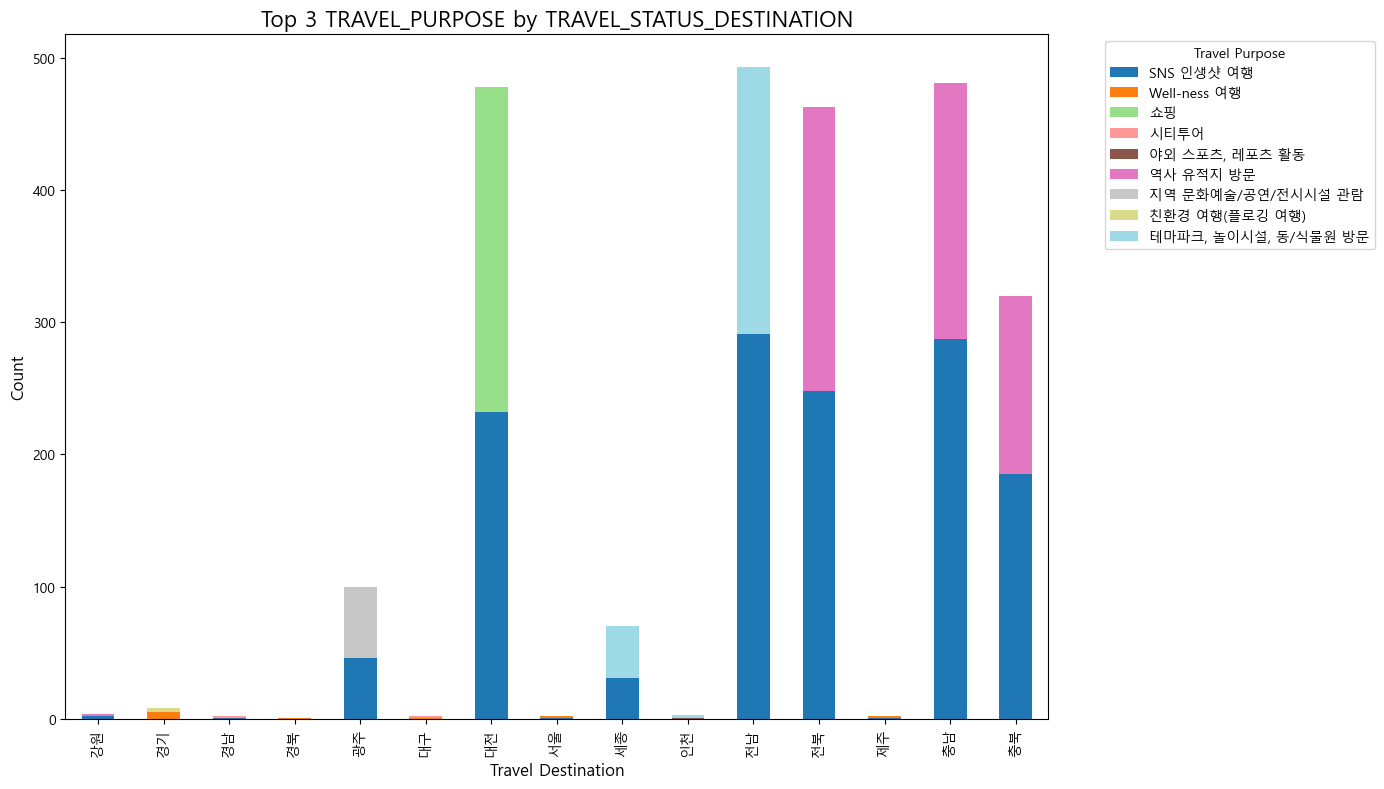

In [8]:
# TRAVEL_PURPOSE를 ';'로 분리하여 각 목적을 개별 행으로 확장
data_expanded = data.assign(
    TRAVEL_PURPOSE=data['TRAVEL_PURPOSE'].str.split(';')
).explode('TRAVEL_PURPOSE')

# TRAVEL_STATUS_DESTINATION 별 TRAVEL_PURPOSE 빈도 계산
purpose_by_destination = data_expanded.groupby(['TRAVEL_STATUS_DESTINATION', 'TRAVEL_PURPOSE']).size().reset_index(name='count')

# 각 지역별로 상위 3순위 여행 목적 추출
top_purposes = (
    purpose_by_destination.groupby('TRAVEL_STATUS_DESTINATION')
    .apply(lambda x: x.nlargest(2, 'count'))
    .reset_index(drop=True)
)

# 시각화를 위한 피벗 테이블 생성
pivot_data = top_purposes.pivot(index='TRAVEL_STATUS_DESTINATION', columns='TRAVEL_PURPOSE', values='count').fillna(0)

# 그래프 생성
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Top 3 TRAVEL_PURPOSE by TRAVEL_STATUS_DESTINATION', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Travel Destination', fontsize=12)
plt.legend(title='Travel Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 출력
plt.show()